### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se
import numpy as np

dati = pd.read_csv("data.csv")

dati

,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
127,1960-08,606.0
128,1960-09,508.0
129,1960-10,461.0
130,1960-11,NaN


In [3]:
dati["mese_numerico"] = np.arange(1, len(dati["date"])+1) #Conta i mesi?????
dati

,date,passengers,mese_numerico
0,1949-01,112.0,1
1,1949-02,118.0,2
2,1949-03,132.0,3
3,1949-04,129.0,4
4,1949-05,121.0,5
...,...,...,...
127,1960-08,606.0,128
128,1960-09,508.0,129
129,1960-10,461.0,130
130,1960-11,NaN,131


MAE: 281.4612520676968, RMSE: 287.16681720444075
MAE NP: 217.24427480916015, RMSE NP: 230.7195746200019


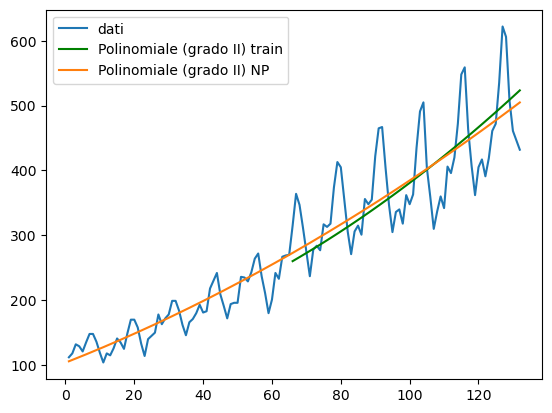

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import interp1d
import scipy as sp
from math import *
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

dati = dati.dropna()
X = dati[["mese_numerico"]].values
y = dati[["passengers"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(len(dati)/2), shuffle=False)
model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly2.fit(X_train, y_train)
y_pred_poly2 = model_poly2.predict(X_test)
#model_poly2a = make_pipeline(PolynomialFeatures(2), LinearRegression())
#model_poly2a.fit(X_test, y_test)
#y_pred_poly2a = model_poly2a.predict(X_train)
a, b, c = np.polyfit(dati["mese_numerico"],dati["passengers"] , 2)
plolyf2np = a*dati["mese_numerico"]**2 + b*dati["mese_numerico"]**1 + c
plt.plot(X, y, label = "dati")
plt.plot(X_test, y_pred_poly2, label = "Polinomiale (grado II) train", color="green")
plt.plot(X, plolyf2np, label = "Polinomiale (grado II) NP")
#plt.plot(X_train, y_pred_poly2a, label = "Polinomiale (grado II) test", color="green")
plt.legend()
print("MAE: {}, RMSE: {}".format(mean_absolute_error(X_test, y_pred_poly2), root_mean_squared_error(X_test, y_pred_poly2)))
print("MAE NP: {}, RMSE NP: {}".format(mean_absolute_error(X, plolyf2np), root_mean_squared_error(X, plolyf2np)))



### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [1]:
import numpy as np
from dash import *
from dash.dependencies import Input, Output
import plotly.express as pl
from math import *
from random import *
import pandas as pa
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.interpolate import interp1d
import scipy as sp



app = Dash(__name__)
app.layout = html.Div([html.H4("Slider polinomio e grafico"), dcc.Slider(id = "slider grado del polinomio", min = 1, max = 10, step = 1, value = 4, marks = {i: str(i) for i in range (1, 11)}), dcc.Graph(id="scatter-plot")])

In [ ]:
@app.callback(Output("scatter-plot", "figure"), Input("slider grado del polinomio", "value"))
def scatplot(grado):
    a = np.linspace(-3, 3, 100)
    b = np.linspace(0, 0, 100)
    for i in range(1, grado+1):
        b = b + randint(1, i)*a**i + random() #rumore
    df = pa.DataFrame({"x": a, "y": b})
    X = df[["x"]].values
    Y = df[["y"]].values
    xr, yr, xt, xy = train_test_split(X, Y, test_size= 0.75) #Xtrain, Xtest, Ytrain, Ytest
    ploynom = make_pipeline(PolynomialFeatures(grado), LinearRegression())
    ploynom.fit(xr, xt)
    predy = ploynom.predict(yr)
    yr = yr.reshape(1, len(xt))
    yr = yr.tolist()
    print(predy)
    predy = predy.reshape(1, 75)
    predy = predy.tolist()
    yr = yr[0]
    predy = predy[0]
    print(xt, predy, "\n", a, b)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = a, y = b))
    fig.add_trace(go.Scatter(x = yr, y = predy, line = dict(width = 5)))
    return fig

In [3]:
if __name__ == '__main__':
    app.run(debug = True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
Cell In[2], line 14, in scatplot(grado=4)
     12 ploynom.fit(xr, xt)
     13 predy = ploynom.predict(yr)
---> 14 yr = yr.reshape(1, len(xt))
        yr = array([[-2.15151515],
       [-0.6969697 ],
       [-2.21212121],
       [ 1.72727273],
       [ 0.15151515],
       [ 2.51515152],
       [-2.39393939],
       [ 2.03030303],
       [ 0.63636364],
       [ 1.        ],
       [-1.84848485],
       [ 0.45454545],
       [ 1.42424242],
       [ 1.06060606],
       [ 1.84848485],
       [-2.87878788],
       [ 1.24242424],
       [ 1.90909091],
       [ 2.75757576],
       [ 0.81818182],
       [-1.72727273],
       [ 0.03030303],
       [ 2.6969697 ],
       [ 1.78787879],
       [-0.33333333],
       [-1.54545455],
       [-0.45454545],
       [ 1.60606061],
       [-1.24242424],
       [-1.48484848],
       [-1.18181818],
       [-1.